---

- __Author name:__ UBAIDULLAH

- __Email:__ [ai.bussiness.student0@gmail.com](mailto:ai.bussiness.student0@gmail.com)

- __GitHub:__ [github.com/ubaid-X/](https://github.com/ubaid-X/)

- __LinkedIn Profile:__ [linkedin.com/in/ubaid-ullah-634563373/](https://www.linkedin.com/in/ubaid-ullah-634563373/)

- __Kaggle:__ [kaggle.com/ubaidullah01](https://www.kaggle.com/ubaidullah01)

---

> # 15+ Plots/Charts in plotly

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# 1. Scatter Plot/Chart

In [5]:
fig1 = px.scatter(df, x='sepal_length', y='sepal_width', title='sepal_length vs sepal_width', color='species')
fig1.show()
# saving the plot
fig1.write_image('./viz outputs/plots/fig1.png', scale=3)

# 2. Line Plot

In [6]:
# sort the data
df_sort = df.sort_values(by='sepal_length') 

fig2 = px.line(df_sort, x='sepal_length', y='sepal_width', color='species')
fig2.show()

# saving the plot
fig2.write_image('./viz outputs/plots/fig2_plot.png', scale=3)


# 3. Bar Plot

In [4]:
# group values based on means
df_bar = df.groupby('species').mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [5]:
fig3 = px.bar(df_bar, x='species', y='sepal_width')
fig3.show()

# saving plot
fig3.write_image('./viz outputs/plots/fig3_plot.png', scale=3)

<Axes: xlabel='species', ylabel='sepal_width'>

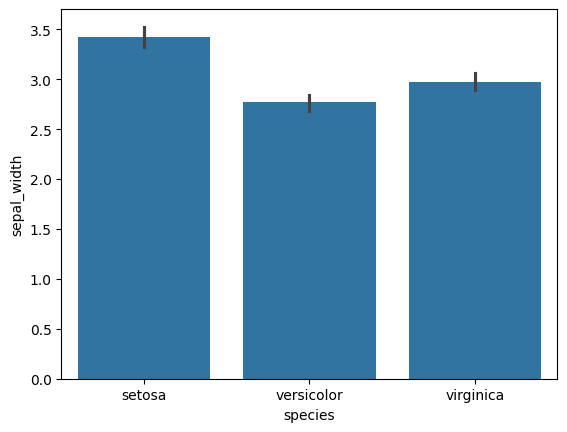

In [ ]:
# seaborn doesn't need to make mean groups
sns.barplot(df, x='species', y='sepal_width')

# 4. Box Plot

In [ ]:
fig4 = px.box(df, x='species', y='sepal_length', color='species')
fig4.show()

# saving the plot
fig4.write_image('./viz outputs/plots/fi4.png', scale=3)

# 5. violin plot

In [ ]:
fig5 = px.violin(df, x='species', y='sepal_length', color='species')
fig5.show()

# saving the plot
fig5.write_image('./viz outputs/plots/fig5_plot.png', scale=3)

- we can create box plot in violin plot

In [ ]:
fig5 = px.violin(df, x='species', y='sepal_length', color='species', box=True)
fig5.show()


# 6. Histogram Plot

In [ ]:
fig6 = px.histogram(df, x='sepal_length', color='species')
fig6.show()

# saving the plot
fig6.write_image('./viz outputs/plots/fig6_plot.png', scale=3)

# 7. Pie Chart

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()

# saving the plot
fig7.write_image('./viz outputs/plots/fig7_plot.png', scale=3)

# 8. 3D scatter Plot

In [ ]:
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig8.show()

# saving the plot
fig8.write_html('./viz outputs/plots/fig8_plot.html')



# 9. Area chart

In [6]:
df_area = df.sort_values(by='sepal_length')

fig9 = px.area(df_area, x='sepal_length', y= 'sepal_width', color='species')
fig9.show()

# 10. Bubble Chart

In [ ]:
fig10 = px.scatter(df, x= 'sepal_width', y='sepal_length',size='sepal_width', color='species')
fig10.show()

# saving the plot
fig10.write_image('./viz outputs/plots/fig10_plot.png', scale=3)

# 11. Sunburst chart

In [8]:
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='count')
df_sunburst.head()

,species,petal_width,count
0,setosa,0.1,5
1,setosa,0.2,29
2,setosa,0.3,7
3,setosa,0.4,7
4,setosa,0.5,1


In [ ]:
fig11 = px.sunburst(df_sunburst, path=['species','petal_width'], values='count')
fig11.show()

# saving the plot
fig11.write_html('./viz outputs/plots/fig11_plot.html')

# 12. parallel coordinates plot

- best for machine algorithm
- to find similirity and difference

In [ ]:
# add a  numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# parallel coordinate plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={"species_id": "species"}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()

# saving the plot
fig12.write_html('./viz outputs/plots/fig12_plot.html')

# 13. Density contour plot

- to find outlier

In [11]:
fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()

# saving the plot
fig13.write_html('./viz outputs/plots/fig13_plot.html')

# 14. Ternary Plot

In [14]:
fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()

# saving the plot
fig14.write_html('./viz outputs/plots/fig14_plot.html')

# 15. Polar chart (radar chart)

In [9]:
df_radar = df.groupby('species').mean().reset_index()
df_radar

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [11]:
# polar chart
fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()

# saving the plot
fig15.write_html('./viz outputs/plots/fig15_plot.html')